In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Look at starter usage data

In [3]:
df = pd.read_csv("UU0_leads.csv")
df['Usage %'] = df['Usage %'].str.rstrip('%').astype('float') / 100.0
df.head()

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Sableye,0.125,1,12.500%,2014-11,gen5uu-0,Singles
1,2,Scrafty,0.125,1,12.500%,2014-11,gen5uu-0,Singles
2,3,Crobat,0.125,1,12.500%,2014-11,gen5uu-0,Singles
3,4,Azelf,0.125,1,12.500%,2014-11,gen5uu-0,Singles
4,5,Gligar,0.125,1,12.500%,2014-11,gen5uu-0,Singles


In [4]:
df.dtypes

Rank             int64
Pokemon         object
Usage %        float64
Raw              int64
%               object
date            object
tier            object
battle_type     object
dtype: object

In [5]:
# tiers are separated by generations and doubles vs singles
df["tier"].unique()

array(['gen5uu-0', 'lcuu-0', 'uu-0', 'gen4uu-0', 'doublesuu-0',
       'gen1uu-0', 'gen2uu-0', 'gen3uu-0', 'gen7uu-0', 'gen7doublesuu-0',
       'gen6doublesuu-0', 'gen6uu-0', 'gen8uu-0', 'gen8doublesuu-0',
       'gen8nationaldexuu-0'], dtype=object)

In [6]:
# Look first at just specified generations and singles
df_singles = df.loc[(df["battle_type"]=="Singles") & (df["tier"].str.contains("gen",regex=True))]
df_singles["tier"].unique()

array(['gen5uu-0', 'gen4uu-0', 'gen1uu-0', 'gen2uu-0', 'gen3uu-0',
       'gen7uu-0', 'gen6uu-0', 'gen8uu-0', 'gen8nationaldexuu-0'],
      dtype=object)

In [7]:
# look at top 10 ranked starters per generation
df_top10 = df_singles.loc[df_singles["Rank"]<=10]
df_top10

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Sableye,0.125000,1,12.500%,2014-11,gen5uu-0,Singles
1,2,Scrafty,0.125000,1,12.500%,2014-11,gen5uu-0,Singles
2,3,Crobat,0.125000,1,12.500%,2014-11,gen5uu-0,Singles
3,4,Azelf,0.125000,1,12.500%,2014-11,gen5uu-0,Singles
4,5,Gligar,0.125000,1,12.500%,2014-11,gen5uu-0,Singles
...,...,...,...,...,...,...,...,...
103355,6,Zeraora,0.031527,8574,3.153%,2021-02,gen8uu-0,Singles
103356,7,Mew,0.027641,7517,2.764%,2021-02,gen8uu-0,Singles
103357,8,Skarmory,0.023666,6436,2.367%,2021-02,gen8uu-0,Singles
103358,9,Rotom-Wash,0.023489,6388,2.349%,2021-02,gen8uu-0,Singles


In [8]:
# Groups the same pokemon across different tiers and gets the average usage percent per pokemon
a = df_top10.groupby(['Pokemon']).mean()["Usage %"].sort_values(ascending=False)

# Groups the same pokemon across different tiers and gets the total number os usages
b = df_top10.groupby(['Pokemon']).sum()["Raw"].sort_values(ascending=False)

# Groups the same pokemon across different tiers and gets the number of times it has appeared in the top 10
c = df_top10.groupby(['Pokemon']).count()["Rank"].sort_values(ascending=False)

In [9]:
# Some pokemon are only used a few times and their usage % may be skewed by the low numbers
# This merges the three tables above so a minimum usage threshold can be implemented
mergedstuff = pd.merge(a,b, on=["Pokemon"], how='inner')
mergedstuff = pd.merge(mergedstuff,c, on=["Pokemon"], how='inner')
mergedstuff.head()

,Usage %,Raw,Rank
Pokemon,,,
Jolteon,0.500000,1,1
Kingler,0.500000,2,1
Gabite,0.500000,1,1
Roselia,0.500000,1,1
Glalie,0.288314,43,2


In [10]:
# takes only pokemon that have been used at least 500 times
min_usage = mergedstuff.loc[mergedstuff["Raw"]>=500]
min_usage.head()

,Usage %,Raw,Rank
Pokemon,,,
Hypno,0.136965,3150,17
Qwilfish,0.133371,1519,17
Tentacruel,0.117476,1456,6
Empoleon,0.116767,1209,6
Scyther,0.115302,753,16


In [11]:
# Read in pokedex file for pokemon stats
df2 = pd.read_csv("Pokedex.csv")
df2 = df2.rename(columns={"Name":"Pokemon"})  # rename the column to merge
df2.head()

,Pokemon,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
0,Bulbasaur,"GRASS,POISON","0.7 m, 6.9 kg","Overgrow,Chlorophyll",45,49,49,65,65,45,318
1,Ivysaur,"GRASS,POISON","1 m, 13 kg","Overgrow,Chlorophyll",60,62,63,80,80,60,405
2,Venusaur,"GRASS,POISON","2 m, 100 kg","Overgrow,Chlorophyll",80,82,83,100,100,80,525
3,Venusaur-Mega,"GRASS,POISON","2.4 m, 155.5 kg",Thick Fat,80,100,123,122,120,80,625
4,Venusaur-Gmax,"GRASS,POISON","2 m, 0 kg","Overgrow,Chlorophyll",80,82,83,100,100,80,525


In [12]:
# Join the usage table and the pokedex together
fullmerge = pd.merge(min_usage,df2, on=["Pokemon"], how='inner')
fullmerge.head()

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
0,Hypno,0.136965,3150,17,PSYCHIC,"1.6 m, 75.6 kg","Insomnia,Forewarn,Inner Focus",85,73,70,73,115,67,483
1,Qwilfish,0.133371,1519,17,"WATER,POISON","0.5 m, 3.9 kg","Poison Point,Swift Swim,Intimidate",65,95,85,55,55,85,440
2,Tentacruel,0.117476,1456,6,"WATER,POISON","1.6 m, 55 kg","Clear Body,Liquid Ooze,Rain Dish",80,70,65,80,120,100,515
3,Empoleon,0.116767,1209,6,"WATER,STEEL","1.7 m, 84.5 kg","Torrent,Defiant",84,86,88,111,101,60,530
4,Scyther,0.115302,753,16,"BUG,FLYING","1.5 m, 56 kg","Swarm,Technician,Steadfast",70,110,80,55,80,105,500


In [13]:
# Look at the top 10 highest usage % pokemon
top_usage = fullmerge.sort_values(by=["Usage %"],ascending=False)[:10]
top_usage

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
0,Hypno,0.136965,3150,17,PSYCHIC,"1.6 m, 75.6 kg","Insomnia,Forewarn,Inner Focus",85,73,70,73,115,67,483
1,Qwilfish,0.133371,1519,17,"WATER,POISON","0.5 m, 3.9 kg","Poison Point,Swift Swim,Intimidate",65,95,85,55,55,85,440
2,Tentacruel,0.117476,1456,6,"WATER,POISON","1.6 m, 55 kg","Clear Body,Liquid Ooze,Rain Dish",80,70,65,80,120,100,515
3,Empoleon,0.116767,1209,6,"WATER,STEEL","1.7 m, 84.5 kg","Torrent,Defiant",84,86,88,111,101,60,530
4,Scyther,0.115302,753,16,"BUG,FLYING","1.5 m, 56 kg","Swarm,Technician,Steadfast",70,110,80,55,80,105,500
5,Omastar,0.104015,824,19,"ROCK,WATER","1 m, 35 kg","Swift Swim,Shell Armor,Weak Armor",70,60,125,115,70,55,495
6,Nidoqueen,0.099946,14066,15,"POISON,GROUND","1.3 m, 60 kg","Poison Point,Rivalry,Sheer Force",90,92,87,75,85,76,505
7,Venusaur,0.095919,819,23,"GRASS,POISON","2 m, 100 kg","Overgrow,Chlorophyll",80,82,83,100,100,80,525
8,Uxie,0.094969,1824,22,PSYCHIC,"0.3 m, 0.3 kg",Levitate,75,75,130,75,130,95,580
9,Kangaskhan,0.091675,747,10,NORMAL,"2.2 m, 80 kg","Early Bird,Scrappy,Inner Focus",105,95,80,40,80,90,490


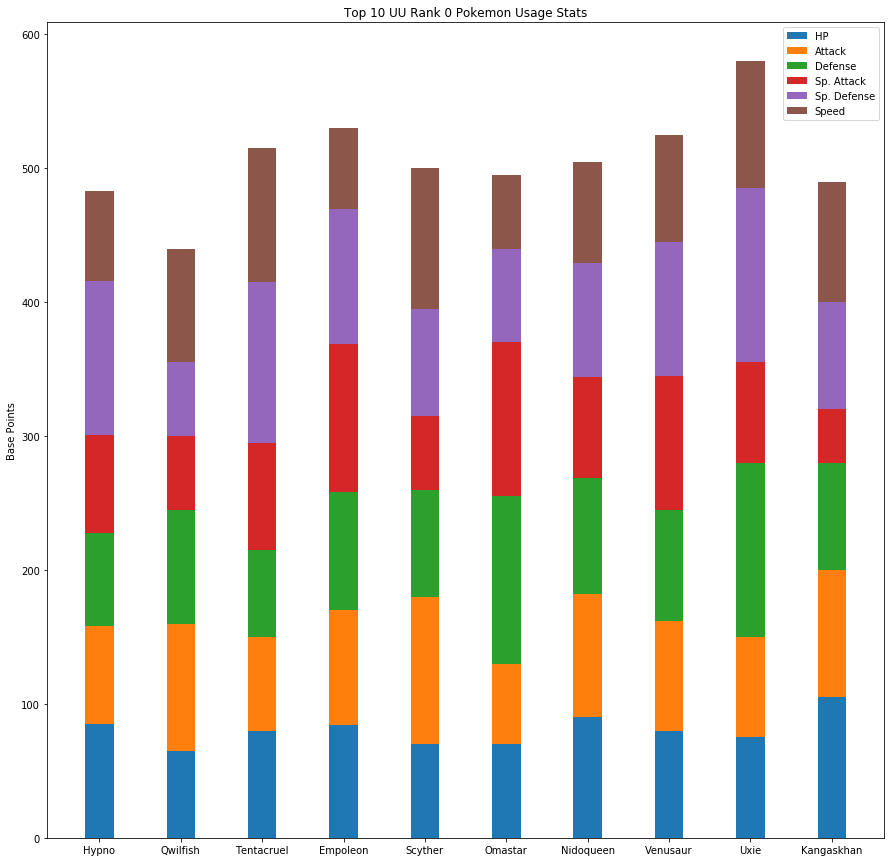

In [16]:
pokemon = top_usage["Pokemon"].values
hp = top_usage["HP"].values
attack = top_usage["Attack"].values
defense = top_usage["Defense"].values
spatk = top_usage["Sp. Atk"].values
spdef = top_usage["Sp. Def"].values
speed = top_usage["Speed"].values

width = 0.35       # the width of the bars: can also be len(x) sequence
fig= plt.figure(figsize=(15,15))

p1 = plt.bar(pokemon, hp, width)
p2 = plt.bar(pokemon, attack, width, bottom=hp)
p3 = plt.bar(pokemon, defense, width, bottom=hp+attack)
p4 = plt.bar(pokemon, spatk, width, bottom=hp+attack+defense)
p5 = plt.bar(pokemon, spdef, width, bottom=hp+attack+defense+spatk)
p6 = plt.bar(pokemon, speed, width, bottom=hp+attack+defense+spatk+spdef)

plt.ylabel('Base Points')
plt.title('Top 10 UU Rank 0 Pokemon Usage Stats')
plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0], p6[0]), ('HP','Attack','Defense','Sp. Attack','Sp. Defense','Speed'))
plt.show()

Based on the statspread above, the starters with the highest percent usage tend to be less offensive oriented. This could indicate a starting strategy that does not involve attacking immediately. Either hazard setting, status spreading or screen setups would all fall into this strategy.

In [17]:
# Top 10 by pure raw number usage
top_usage_raw = fullmerge.sort_values(by=["Raw"],ascending=False)[:10]
top_usage_raw

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
28,Azelf,0.050889,836763,79,PSYCHIC,"0.3 m, 0.3 kg",Levitate,75,125,70,125,70,115,580
47,Krookodile,0.031371,532028,61,"GROUND,DARK","1.5 m, 96.3 kg","Intimidate,Moxie,Anger Point",95,117,80,65,70,92,519
52,Infernape,0.028722,526923,63,"FIRE,FIGHTING","1.2 m, 55 kg","Blaze,Iron Fist",76,104,71,104,71,108,534
40,Mamoswine,0.034815,525313,53,"ICE,GROUND","2.5 m, 291 kg","Oblivious,Snow Cloak,Thick Fat",110,130,80,70,60,80,530
56,Scizor,0.027082,518530,57,"BUG,STEEL","1.8 m, 118 kg","Swarm,Technician,Light Metal",70,130,100,55,80,65,500
46,Swampert,0.031609,481176,64,"WATER,GROUND","1.5 m, 81.9 kg","Torrent,Damp",100,110,90,85,90,60,535
43,Beedrill-Mega,0.032692,452335,62,"BUG,POISON","1.4 m, 40.5 kg",Adaptability,65,150,40,15,80,145,495
33,Gliscor,0.041159,337258,18,"GROUND,FLYING","2 m, 42.5 kg","Hyper Cutter,Sand Veil,Poison Heal",75,95,125,45,75,95,510
67,Hippowdon,0.024469,336351,39,GROUND,"2 m, 300 kg","Sand Stream,Sand Force",108,112,118,68,72,47,525
44,Rotom-Wash,0.032169,213646,25,"ELECTRIC,WATER","0.3 m, 0.3 kg",Levitate,50,65,107,105,107,86,520


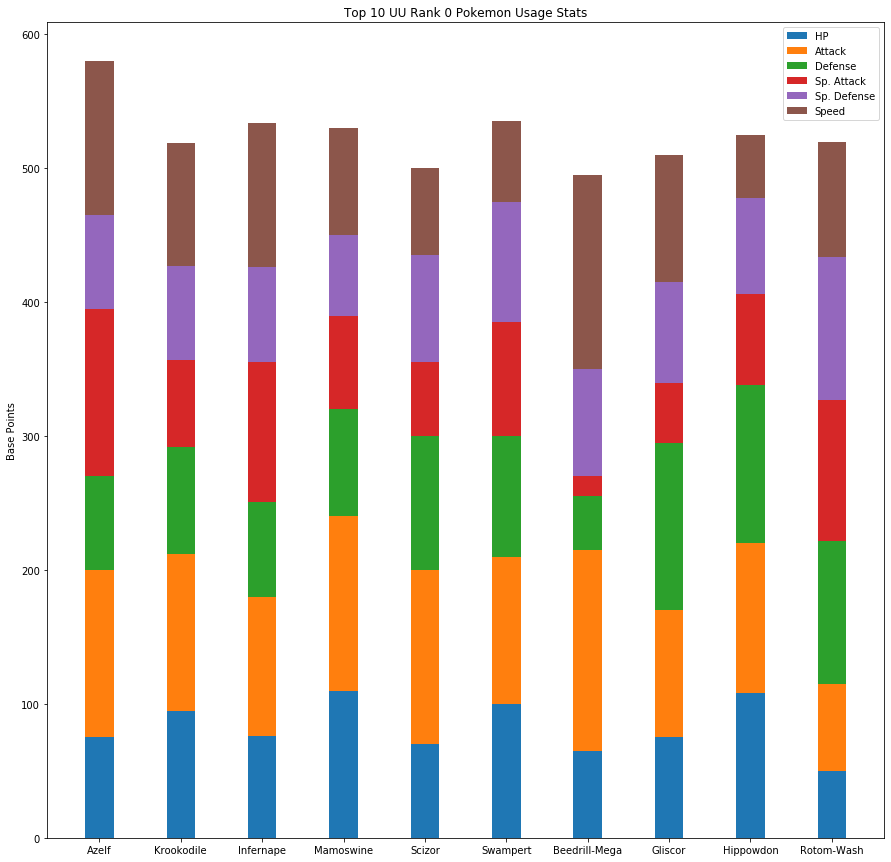

In [18]:
pokemon = top_usage_raw["Pokemon"].values
hp = top_usage_raw["HP"].values
attack = top_usage_raw["Attack"].values
defense = top_usage_raw["Defense"].values
spatk = top_usage_raw["Sp. Atk"].values
spdef = top_usage_raw["Sp. Def"].values
speed = top_usage_raw["Speed"].values

width = 0.35       # the width of the bars: can also be len(x) sequence
fig= plt.figure(figsize=(15,15))

p1 = plt.bar(pokemon, hp, width)
p2 = plt.bar(pokemon, attack, width, bottom=hp)
p3 = plt.bar(pokemon, defense, width, bottom=hp+attack)
p4 = plt.bar(pokemon, spatk, width, bottom=hp+attack+defense)
p5 = plt.bar(pokemon, spdef, width, bottom=hp+attack+defense+spatk)
p6 = plt.bar(pokemon, speed, width, bottom=hp+attack+defense+spatk+spdef)

plt.ylabel('Base Points')
plt.title('Top 10 UU Rank 0 Pokemon Usage Stats')
plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0], p6[0]), ('HP','Attack','Defense','Sp. Attack','Sp. Defense','Speed'))
plt.show()

The top 10 most used starters based on raw number of usage appear to fall into three categories: speedy offense, hazard setter, and pivoter. One pokemon can fall into more than one of the three categories. Being on more than one category would likely increase the usage of a pokemon because of its versatility. Infernape for example can fit into all three categories based on the moveset, stat EV spread and item. Slower pokemon tend to make up for it in the defense/Sp. Defense department.

In [19]:
# Top 10 by number of times it has appeared in top 10
top_usage_rank = fullmerge.sort_values(by=["Rank"],ascending=False)[:10]
top_usage_rank

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
28,Azelf,0.050889,836763,79,PSYCHIC,"0.3 m, 0.3 kg",Levitate,75,125,70,125,70,115,580
46,Swampert,0.031609,481176,64,"WATER,GROUND","1.5 m, 81.9 kg","Torrent,Damp",100,110,90,85,90,60,535
52,Infernape,0.028722,526923,63,"FIRE,FIGHTING","1.2 m, 55 kg","Blaze,Iron Fist",76,104,71,104,71,108,534
43,Beedrill-Mega,0.032692,452335,62,"BUG,POISON","1.4 m, 40.5 kg",Adaptability,65,150,40,15,80,145,495
47,Krookodile,0.031371,532028,61,"GROUND,DARK","1.5 m, 96.3 kg","Intimidate,Moxie,Anger Point",95,117,80,65,70,92,519
56,Scizor,0.027082,518530,57,"BUG,STEEL","1.8 m, 118 kg","Swarm,Technician,Light Metal",70,130,100,55,80,65,500
40,Mamoswine,0.034815,525313,53,"ICE,GROUND","2.5 m, 291 kg","Oblivious,Snow Cloak,Thick Fat",110,130,80,70,60,80,530
67,Hippowdon,0.024469,336351,39,GROUND,"2 m, 300 kg","Sand Stream,Sand Force",108,112,118,68,72,47,525
10,Ambipom,0.090747,35638,39,NORMAL,"1.2 m, 20.3 kg","Technician,Pickup,Skill Link",75,100,66,60,66,115,482
45,Aggron-Mega,0.031687,135425,27,STEEL,"2.2 m, 395 kg",Filter,70,140,230,60,80,50,630


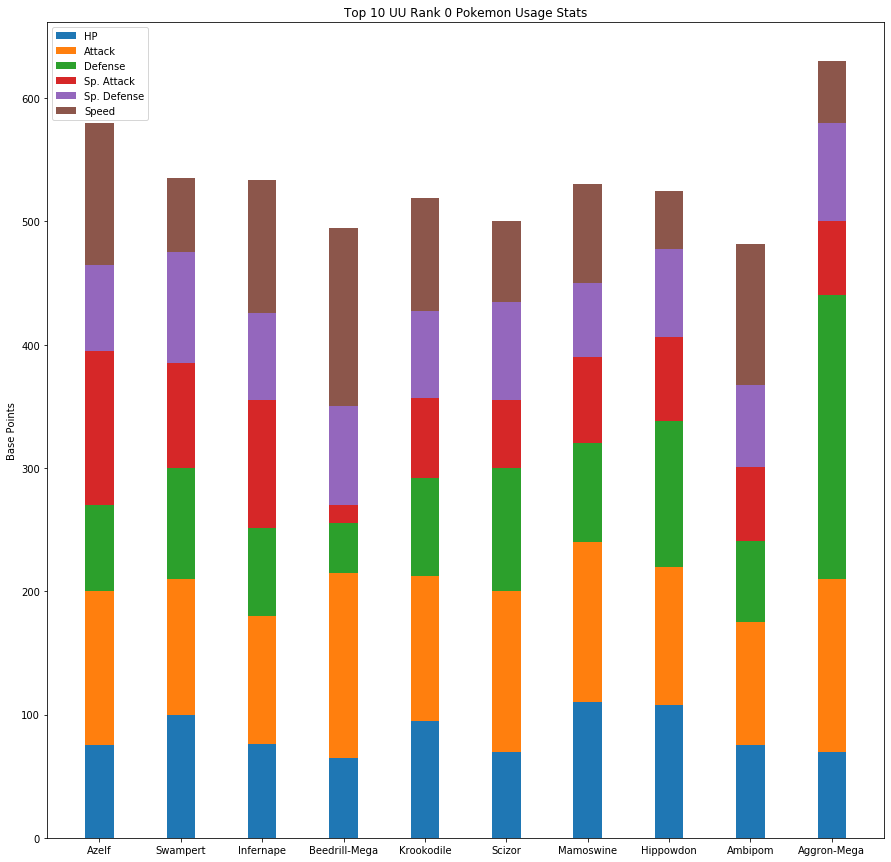

In [20]:
pokemon = top_usage_rank["Pokemon"].values
hp = top_usage_rank["HP"].values
attack = top_usage_rank["Attack"].values
defense = top_usage_rank["Defense"].values
spatk = top_usage_rank["Sp. Atk"].values
spdef = top_usage_rank["Sp. Def"].values
speed = top_usage_rank["Speed"].values

width = 0.35       # the width of the bars: can also be len(x) sequence
fig= plt.figure(figsize=(15,15))

p1 = plt.bar(pokemon, hp, width)
p2 = plt.bar(pokemon, attack, width, bottom=hp)
p3 = plt.bar(pokemon, defense, width, bottom=hp+attack)
p4 = plt.bar(pokemon, spatk, width, bottom=hp+attack+defense)
p5 = plt.bar(pokemon, spdef, width, bottom=hp+attack+defense+spatk)
p6 = plt.bar(pokemon, speed, width, bottom=hp+attack+defense+spatk+spdef)

plt.ylabel('Base Points')
plt.title('Top 10 UU Rank 0 Pokemon Usage Stats')
plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0], p6[0]), ('HP','Attack','Defense','Sp. Attack','Sp. Defense','Speed'))
plt.show()

The overlap between number of occurences in top 10 and top 10 based on raw usage stats is great (8/10) which means not only are these pokemon used a lot, they are used consistently across a span of time.

# Compare usage across tiers

In [85]:
df = pd.read_csv("UU0_leads.csv")
df['Usage %'] = df['Usage %'].str.rstrip('%').astype('float') / 100.0
df.head()

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Sableye,0.125,1,12.500%,2014-11,gen5uu-0,Singles
1,2,Scrafty,0.125,1,12.500%,2014-11,gen5uu-0,Singles
2,3,Crobat,0.125,1,12.500%,2014-11,gen5uu-0,Singles
3,4,Azelf,0.125,1,12.500%,2014-11,gen5uu-0,Singles
4,5,Gligar,0.125,1,12.500%,2014-11,gen5uu-0,Singles


In [86]:
df1 = pd.read_csv("UU1500_leads.csv")
df1['Usage %'] = df1['Usage %'].str.rstrip('%').astype('float') / 100.0
df1.head()

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Azelf,0.157031,1,12.500%,2014-11,gen5uu-1500,Singles
1,2,Scrafty,0.157031,1,12.500%,2014-11,gen5uu-1500,Singles
2,3,Crobat,0.157031,1,12.500%,2014-11,gen5uu-1500,Singles
3,4,Gligar,0.157031,1,12.500%,2014-11,gen5uu-1500,Singles
4,5,Manectric,0.092969,1,12.500%,2014-11,gen5uu-1500,Singles


In [87]:
df2 = pd.read_csv("UU1630_leads.csv")
df2['Usage %'] = df2['Usage %'].str.rstrip('%').astype('float') / 100.0
df2.head()

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Sableye,0.0,1,12.500%,2014-11,gen5uu-1630,Singles
1,2,Scrafty,0.0,1,12.500%,2014-11,gen5uu-1630,Singles
2,3,Crobat,0.0,1,12.500%,2014-11,gen5uu-1630,Singles
3,4,Azelf,0.0,1,12.500%,2014-11,gen5uu-1630,Singles
4,5,Gligar,0.0,1,12.500%,2014-11,gen5uu-1630,Singles


In [88]:
df3 = pd.read_csv("UU1760_leads.csv")
df3['Usage %'] = df3['Usage %'].str.rstrip('%').astype('float') / 100.0
df3.head()

,Rank,Pokemon,Usage %,Raw,%,date,tier,battle_type
0,1,Sableye,0.0,1,12.500%,2014-11,gen5uu-1760,Singles
1,2,Scrafty,0.0,1,12.500%,2014-11,gen5uu-1760,Singles
2,3,Crobat,0.0,1,12.500%,2014-11,gen5uu-1760,Singles
3,4,Azelf,0.0,1,12.500%,2014-11,gen5uu-1760,Singles
4,5,Gligar,0.0,1,12.500%,2014-11,gen5uu-1760,Singles


In [89]:
#Number of datapoints across all tiers are the same
print("UU-0")
print(df.count())
print("\nUU-1500")
print(df1.count())
print("\nUU-1630")
print(df2.count())
print("\nUU-1760")
print(df3.count())

UU-0
Rank           103858
Pokemon        103858
Usage %        103858
Raw            103858
%              103858
date           103858
tier           103858
battle_type    103858
dtype: int64

UU-1500
Rank           103858
Pokemon        103858
Usage %        103858
Raw            103858
%              103858
date           103858
tier           103858
battle_type    103858
dtype: int64

UU-1630
Rank           103858
Pokemon        103858
Usage %        103858
Raw            103858
%              103858
date           103858
tier           103858
battle_type    103858
dtype: int64

UU-1760
Rank           103858
Pokemon        103858
Usage %        103858
Raw            103858
%              103858
date           103858
tier           103858
battle_type    103858
dtype: int64


In [90]:
# Look first at just specified generations and singles
df_singles = df.loc[(df["battle_type"]=="Singles") & (df["tier"].str.contains("gen",regex=True))]

df_singles1 = df1.loc[(df["battle_type"]=="Singles") & (df1["tier"].str.contains("gen",regex=True))]

df_singles2 = df2.loc[(df["battle_type"]=="Singles") & (df2["tier"].str.contains("gen",regex=True))]

df_singles3 = df3.loc[(df3["battle_type"]=="Singles") & (df3["tier"].str.contains("gen",regex=True))]
df_singles3["tier"].unique()

array(['gen5uu-1760', 'gen4uu-1760', 'gen1uu-1760', 'gen2uu-1760',
       'gen3uu-1760', 'gen7uu-1760', 'gen6uu-1760', 'gen8uu-1760',
       'gen8nationaldexuu-1760'], dtype=object)

In [91]:
# look at top 10 ranked starters per generation
df_top10_00 = df_singles.loc[df_singles["Rank"]<=10]

df_top10_1500 = df_singles1.loc[df_singles1["Rank"]<=10]

df_top10_1630 = df_singles2.loc[df_singles2["Rank"]<=10]

df_top10_1760 = df_singles3.loc[df_singles3["Rank"]<=10]

In [92]:
# Groups the same pokemon across different tiers and gets the average usage percent per pokemon
a = df_top10_00.groupby(['Pokemon']).mean()["Usage %"].sort_values(ascending=False)
a1 = df_top10_1500.groupby(['Pokemon']).mean()["Usage %"].sort_values(ascending=False)
a2 = df_top10_1630.groupby(['Pokemon']).mean()["Usage %"].sort_values(ascending=False)
a3 = df_top10_1760.groupby(['Pokemon']).mean()["Usage %"].sort_values(ascending=False)

# Groups the same pokemon across different tiers and gets the total number os usages
b = df_top10_00.groupby(['Pokemon']).sum()["Raw"].sort_values(ascending=False)
b1 = df_top10_1500.groupby(['Pokemon']).sum()["Raw"].sort_values(ascending=False)
b2 = df_top10_1630.groupby(['Pokemon']).sum()["Raw"].sort_values(ascending=False)
b3 = df_top10_1760.groupby(['Pokemon']).sum()["Raw"].sort_values(ascending=False)

# Groups the same pokemon across different tiers and gets the number of times it has appeared in the top 10
c = df_top10_00.groupby(['Pokemon']).count()["Rank"].sort_values(ascending=False)
c1 = df_top10_1500.groupby(['Pokemon']).count()["Rank"].sort_values(ascending=False)
c2 = df_top10_1630.groupby(['Pokemon']).count()["Rank"].sort_values(ascending=False)
c3 = df_top10_1760.groupby(['Pokemon']).count()["Rank"].sort_values(ascending=False)

In [93]:
# Some pokemon are only used a few times and their usage % may be skewed by the low numbers
# This merges the three tables above so a minimum usage threshold can be implemented
mergedstuff00 = pd.merge(a,b, on=["Pokemon"], how='inner')
mergedstuff00 = pd.merge(mergedstuff00,c, on=["Pokemon"], how='inner')

mergedstuff1500 = pd.merge(a1,b1, on=["Pokemon"], how='inner')
mergedstuff1500 = pd.merge(mergedstuff1500,c1, on=["Pokemon"], how='inner')

mergedstuff1630 = pd.merge(a2,b2, on=["Pokemon"], how='inner')
mergedstuff1630 = pd.merge(mergedstuff1630,c2, on=["Pokemon"], how='inner')

mergedstuff1760 = pd.merge(a3,b3, on=["Pokemon"], how='inner')
mergedstuff1760 = pd.merge(mergedstuff1760,c3, on=["Pokemon"], how='inner')

In [94]:
# takes only pokemon that have been used at least 500 times
min_usage00 = mergedstuff00.loc[mergedstuff00["Raw"]>=500]

min_usage1500 = mergedstuff1500.loc[mergedstuff1500["Raw"]>=500]

min_usage1630 = mergedstuff1630.loc[mergedstuff1630["Raw"]>=500]

min_usage1760 = mergedstuff1760.loc[mergedstuff1760["Raw"]>=500]

In [95]:
# Read in pokedex file for pokemon stats
poke_df = pd.read_csv("Pokedex.csv")
poke_df = poke_df.rename(columns={"Name":"Pokemon"})  # rename the column to merge
poke_df.head()

,Pokemon,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
0,Bulbasaur,"GRASS,POISON","0.7 m, 6.9 kg","Overgrow,Chlorophyll",45,49,49,65,65,45,318
1,Ivysaur,"GRASS,POISON","1 m, 13 kg","Overgrow,Chlorophyll",60,62,63,80,80,60,405
2,Venusaur,"GRASS,POISON","2 m, 100 kg","Overgrow,Chlorophyll",80,82,83,100,100,80,525
3,Venusaur-Mega,"GRASS,POISON","2.4 m, 155.5 kg",Thick Fat,80,100,123,122,120,80,625
4,Venusaur-Gmax,"GRASS,POISON","2 m, 0 kg","Overgrow,Chlorophyll",80,82,83,100,100,80,525


In [96]:
# Join the usage table and the pokedex together
fullmerge00 = pd.merge(min_usage00,poke_df, on=["Pokemon"], how='inner')

fullmerge1500 = pd.merge(min_usage1500,poke_df, on=["Pokemon"], how='inner')

fullmerge1630 = pd.merge(min_usage1630,poke_df, on=["Pokemon"], how='inner')

fullmerge1760 = pd.merge(min_usage1760,poke_df, on=["Pokemon"], how='inner')

In [97]:
# get top 10 by usage percentage for each tier
top_usage00 = fullmerge00.sort_values(by=["Usage %"],ascending=False)[:10]

top_usage1500 = fullmerge1500.sort_values(by=["Usage %"],ascending=False)[:10]

top_usage1630 = fullmerge1630.sort_values(by=["Usage %"],ascending=False)[:10]

top_usage1760 = fullmerge1760.sort_values(by=["Usage %"],ascending=False)[:10]
top_usage1760

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
0,Swellow,0.232702,581,10,"NORMAL,FLYING","0.7 m, 19.8 kg","Guts,Scrappy",60,85,60,75,50,125,455
1,Tentacruel,0.190803,1526,9,"WATER,POISON","1.6 m, 55 kg","Clear Body,Liquid Ooze,Rain Dish",80,70,65,80,120,100,515
2,Hypno,0.190517,2953,16,PSYCHIC,"1.6 m, 75.6 kg","Insomnia,Forewarn,Inner Focus",85,73,70,73,115,67,483
3,Victini,0.186308,71279,25,"PSYCHIC,FIRE","0.4 m, 4 kg",Victory Star,100,100,100,100,100,100,600
4,Qwilfish,0.172321,1372,17,"WATER,POISON","0.5 m, 3.9 kg","Poison Point,Swift Swim,Intimidate",65,95,85,55,55,85,440
5,Haunter,0.166411,1542,13,"GHOST,POISON","1.6 m, 0.1 kg",Levitate,45,50,45,115,55,95,405
6,Nidoqueen,0.143012,20385,13,"POISON,GROUND","1.3 m, 60 kg","Poison Point,Rivalry,Sheer Force",90,92,87,75,85,76,505
7,Omastar,0.118123,675,16,"ROCK,WATER","1 m, 35 kg","Swift Swim,Shell Armor,Weak Armor",70,60,125,115,70,55,495
8,Galvantula,0.117563,593,13,"BUG,ELECTRIC","0.8 m, 14.3 kg","Compound Eyes,Unnerve,Swarm",70,77,60,97,60,108,472
9,Swampert-Mega,0.110763,8215,7,"WATER,GROUND","1.9 m, 102 kg",Swift Swim,100,150,110,95,110,70,635


In [98]:
# Get a look at the top 10 across tiers
combined = pd.DataFrame()
combined["UU00_Pokemon"]=top_usage00["Pokemon"]
combined["UU00_Usage%"]=top_usage00["Usage %"]

combined["UU1500_Pokemon"]=top_usage1500["Pokemon"]
combined["UU1500_Usage%"]=top_usage1500["Usage %"]

combined["UU1630_Pokemon"]=top_usage1630["Pokemon"]
combined["UU01630_Usage%"]=top_usage1630["Usage %"]

combined["UU1760_Pokemon"]=top_usage1760["Pokemon"]
combined["UU1760_Usage%"]=top_usage1760["Usage %"]
combined

,UU00_Pokemon,UU00_Usage%,UU1500_Pokemon,UU1500_Usage%,UU1630_Pokemon,UU01630_Usage%,UU1760_Pokemon,UU1760_Usage%
0,Hypno,0.136965,Hypno,0.159298,Tentacruel,0.212696,Swellow,0.232702
1,Qwilfish,0.133371,Tentacruel,0.145044,Hypno,0.203119,Tentacruel,0.190803
2,Tentacruel,0.117476,Qwilfish,0.133303,Victini,0.199940,Hypno,0.190517
3,Empoleon,0.116767,Scyther,0.130806,Omastar,0.172545,Victini,0.186308
4,Scyther,0.115302,Omastar,0.118914,Qwilfish,0.167757,Qwilfish,0.172321
5,Omastar,0.104015,Empoleon,0.113354,Haunter,0.159511,Haunter,0.166411
6,Nidoqueen,0.099946,Nidoqueen,0.110707,Nidoqueen,0.142274,Nidoqueen,0.143012
7,Venusaur,0.095919,Haunter,0.101134,Ambipom,0.131117,Omastar,0.118123
8,Uxie,0.094969,Uxie,0.100298,Rhyperior,0.127597,Galvantula,0.117563
9,Kangaskhan,0.091675,Ambipom,0.100240,Swellow,0.117560,Swampert-Mega,0.110763


Moving forward, I will be exluding usage percent as it is the one most affected by having a min usage cutoff

In [99]:
# get top 10 by usage percentage for each tier
top_usage_raw00 = fullmerge00.sort_values(by=["Raw"],ascending=False)[:10]

top_usage_raw1500 = fullmerge1500.sort_values(by=["Raw"],ascending=False)[:10]

top_usage_raw1630 = fullmerge1630.sort_values(by=["Raw"],ascending=False)[:10]

top_usage_raw1760 = fullmerge1760.sort_values(by=["Raw"],ascending=False)[:10]
top_usage_raw1500

,Pokemon,Usage %,Raw,Rank,Typing,Size,Abilities,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total Base Stats
23,Azelf,0.054868,836874,78,PSYCHIC,"0.3 m, 0.3 kg",Levitate,75,125,70,125,70,115,580
42,Krookodile,0.034731,540191,61,"GROUND,DARK","1.5 m, 96.3 kg","Intimidate,Moxie,Anger Point",95,117,80,65,70,92,519
55,Infernape,0.030192,526889,62,"FIRE,FIGHTING","1.2 m, 55 kg","Blaze,Iron Fist",76,104,71,104,71,108,534
46,Scizor,0.033516,518534,59,"BUG,STEEL","1.8 m, 118 kg","Swarm,Technician,Light Metal",70,130,100,55,80,65,500
32,Mamoswine,0.040926,516586,50,"ICE,GROUND","2.5 m, 291 kg","Oblivious,Snow Cloak,Thick Fat",110,130,80,70,60,80,530
43,Swampert,0.034287,481168,65,"WATER,GROUND","1.5 m, 81.9 kg","Torrent,Damp",100,110,90,85,90,60,535
41,Beedrill-Mega,0.034963,452335,62,"BUG,POISON","1.4 m, 40.5 kg",Adaptability,65,150,40,15,80,145,495
30,Gliscor,0.042136,322751,17,"GROUND,FLYING","2 m, 42.5 kg","Hyper Cutter,Sand Veil,Poison Heal",75,95,125,45,75,95,510
67,Hippowdon,0.026426,293688,35,GROUND,"2 m, 300 kg","Sand Stream,Sand Force",108,112,118,68,72,47,525
37,Hydreigon,0.038273,271344,30,"DARK,DRAGON","1.8 m, 160 kg",Levitate,92,105,90,125,90,98,600


In [100]:
# Get a look at the top 10 raw usage across tiers
combined = pd.DataFrame()
combined["UU00_Pokemon"]=top_usage_raw00["Pokemon"].values
combined["UU00_Usage_raw"]=top_usage_raw00["Raw"].values

combined["UU1500_Pokemon"]=top_usage_raw1500["Pokemon"].values
combined["UU1500_Usage_raw"]=top_usage_raw1500["Raw"].values

combined["UU1630_Pokemon"]=top_usage_raw1630["Pokemon"].values
combined["UU01630_Usage_raw"]=top_usage_raw1630["Raw"].values

combined["UU1760_Pokemon"]=top_usage_raw1760["Pokemon"].values
combined["UU1760_Usage_raw"]=top_usage_raw1760["Raw"].values
combined

,UU00_Pokemon,UU00_Usage_raw,UU1500_Pokemon,UU1500_Usage_raw,UU1630_Pokemon,UU01630_Usage_raw,UU1760_Pokemon,UU1760_Usage_raw
0,Azelf,836763,Azelf,836874,Azelf,832673,Azelf,734571
1,Krookodile,532028,Krookodile,540191,Scizor,535038,Krookodile,540930
2,Infernape,526923,Infernape,526889,Krookodile,528890,Scizor,512092
3,Mamoswine,525313,Scizor,518534,Infernape,490378,Mamoswine,346034
4,Scizor,518530,Mamoswine,516586,Mamoswine,479995,Hydreigon,327277
5,Swampert,481176,Swampert,481168,Swampert,465945,Gliscor,322751
6,Beedrill-Mega,452335,Beedrill-Mega,452335,Hydreigon,331902,Swampert,303091
7,Gliscor,337258,Gliscor,322751,Gliscor,322751,Hippowdon,207657
8,Hippowdon,336351,Hippowdon,293688,Manectric-Mega,217281,Rotom-Heat,205993
9,Rotom-Wash,213646,Hydreigon,271344,Rotom-Wash,197471,Manectric-Mega,201776


In [101]:
# Look at which pokemon appear in top 10 in all 4 rankings
top_count = pd.DataFrame()
top_list=[]
top_list.extend(list(top_usage_raw00["Pokemon"].values))
top_list.extend(list(top_usage_raw1500["Pokemon"].values))
top_list.extend(list(top_usage_raw1630["Pokemon"].values))
top_list.extend(list(top_usage_raw1760["Pokemon"].values))
top_count["Pokemon"] = top_list
top_count.Pokemon.value_counts()

Swampert          4
Gliscor           4
Azelf             4
Krookodile        4
Scizor            4
Mamoswine         4
Hydreigon         3
Infernape         3
Hippowdon         3
Beedrill-Mega     2
Rotom-Wash        2
Manectric-Mega    2
Rotom-Heat        1
Name: Pokemon, dtype: int64

The 6 pokemon to focus on are Swampert, Gliscor, Azelf, Krookodile, Scizor, and Mamoswine